## CNN 알고리즘
- 딥러닝의 꽃!
- 다층 신경망의 기본적인 계산 방식은 각 뉴런 1개씩 계산, 반면에 CNN은 필터(커널)를 활용하여 계산
- 파급효과 
  + (은행) 손글씨 판별기를 만듦 / 상업화 성공
  + 다양한 아류(개선된) 논문들이 쏟아져 나오기 시작
  + 1998년도, LeNet
  + 2012년도, AlexNet
  + ... VGGNet, GoogLeNet
  +2015 년도 ResNet 성능이 사람을 능가하기 시작 -> 영상인식 알고리즘 발전에 도움을 주기 시작

## 패션 MNIST 데이터 불러오기


In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

train_input.shape, train_target.shape, test_input.shape, test_target.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

- 기존 신경망 1차원 배열로 재정렬
- 합성곱 신경망에서는 3차원 배열을 유지해야함. 
- 흑백이미지인 경우도 3차원 배열로 만들어야함.


In [ ]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0  # 정규화
train_scaled.shape #(1을 추가함으로써 3차원배열로 만들었음)

(60000, 28, 28, 1)

## 데이터셋 분리

In [ ]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state = 42
)

train_scaled.shape, val_scaled.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

## 합성곱 신경망 만들기
- 기본 코드의 컨셉은 다층 신경망 구현할 때와 같음

In [ ]:
model = keras.Sequential()

#3차원
                          #32개의 필터, 커널사이즈 = 3*3 배열           padding은 맞지 않아 남는 공간을 same으로 채워준다는 뜻
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))

model.add(keras.layers.MaxPooling2D(2))

#1차원
model.add(keras.layers.Flatten()) #3차원을 1차원으로 바꿔주는 함수 Flatten()
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

원본 이미지
-- Conv2D  ....  MaxPooling  : 표본 샘플이 만들어짐

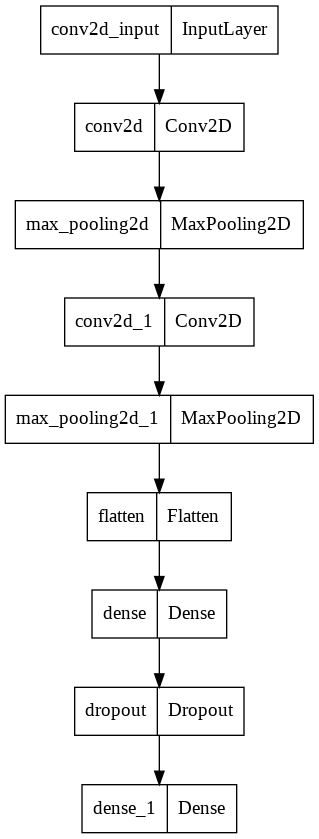

In [ ]:
keras.utils.plot_model(model)

## 모형 훈련

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

## 모델 저장
- 파이썬에서는 모델을 저장한다. 그러나 자바에서는 쉽게 불러올 수 없다.
- 별도의 작업이 필요하다.
  + API 구성 혹은 Embeded형태로 코드 구현 등등 의 방법이 필요함.

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs = 50, validation_data = (val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
1500/1500 [==============================] - 15s 4ms/step - loss: 0.5215 - accuracy: 0.8140 - val_loss: 0.3258 - val_accuracy: 0.8777
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3469 - accuracy: 0.8763 - val_loss: 0.2789 - val_accuracy: 0.8951
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2975 - accuracy: 0.8912 - val_loss: 0.2675 - val_accuracy: 0.8998
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2642 - accuracy: 0.9033 - val_loss: 0.2513 - val_accuracy: 0.9058
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2428 - accuracy: 0.9110 - val_loss: 0.2435 - val_accuracy: 0.9137
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2246 - accuracy: 0.9183 - val_loss: 0.2261 - val_accuracy: 0.9147
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2090 - accuracy: 0.9227 - val_loss: 0.2341 - val_accuracy

## 모형 평가 그래프를 작성한다.

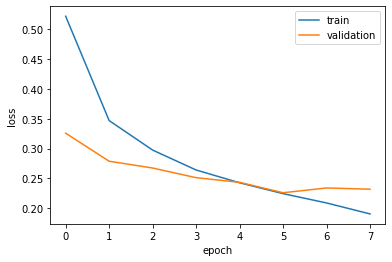

In [ ]:
import matplotlib.pyplot as plt
def eval_graph(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train', 'validation'])
  plt.show()

eval_graph(history)

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2261 - accuracy: 0.9147


[0.22610196471214294, 0.9146666526794434]

## 저장된 모델을 불러온다.

In [ ]:
model2 = keras.models.load_model('/content/best-cnn-model.h5')
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [ ]:
model2.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2261 - accuracy: 0.9147


[0.22610196471214294, 0.9146666526794434]